# Step 3: Reconstruct

In [1]:
distances = [15]
doubleplanes = [12]
energies = [500]
erels = [50, 100, 200, 400, 1000, 2000]
neutrons = [1, 2, 3, 4]
physicss = ["inclxx"]

## a) Run reconstruction

In [2]:
import joblib
from reconstruction import reconstruction

joblib.Parallel(n_jobs=-1, backend="loky", verbose=1)(
    joblib.delayed(reconstruction)(
        distance=distance, doubleplane=doubleplane, energy=energy, erel=erel, neutron=neutron, physics=physics,
    )
    for distance in distances
    for energy in energies
    for doubleplane in doubleplanes
    for neutron in neutrons
    for erel in erels
    for physics in physicss
)

print("Done")

Welcome to JupyROOT 6.16/00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:   23.8s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished


Done


## b) Check for succesful execution

In [3]:
import joblib
import pandas as pd
from helpers import processed_events

evts = pd.DataFrame(
    joblib.Parallel(n_jobs=-1, backend="multiprocessing", verbose=1)(
        joblib.delayed(processed_events)(
            distance=distance,
            doubleplane=doubleplane,
            energy=energy,
            erel=erel,
            neutron=neutron,
            physics=physics,
            what=".reco.root",
        )
        for distance in distances
        for energy in energies
        for doubleplane in doubleplanes
        for neutron in neutrons
        for erel in erels
        for physics in physicss
    )
)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.1s finished


In [4]:
pd.options.display.max_rows = 5
evts.columns = ["File", "Events"]
evts.sort_values(by=["Events", "File"], ascending=[True, True], inplace=True)
evts.style.hide_index().format({"Events": "{:d}"})
display(evts)

,File,Events
4,output/inclxx/15m_12dp_500AMeV_1000keV_1n.reco...,10000
10,output/inclxx/15m_12dp_500AMeV_1000keV_2n.reco...,10000
...,...,...
12,output/inclxx/15m_12dp_500AMeV_50keV_3n.reco.root,10000
18,output/inclxx/15m_12dp_500AMeV_50keV_4n.reco.root,10000


## c) Inspect example file

In [5]:
from helpers import filename_for
import pandas as pd
import numpy as np
import ROOT

3200.0
9291.0


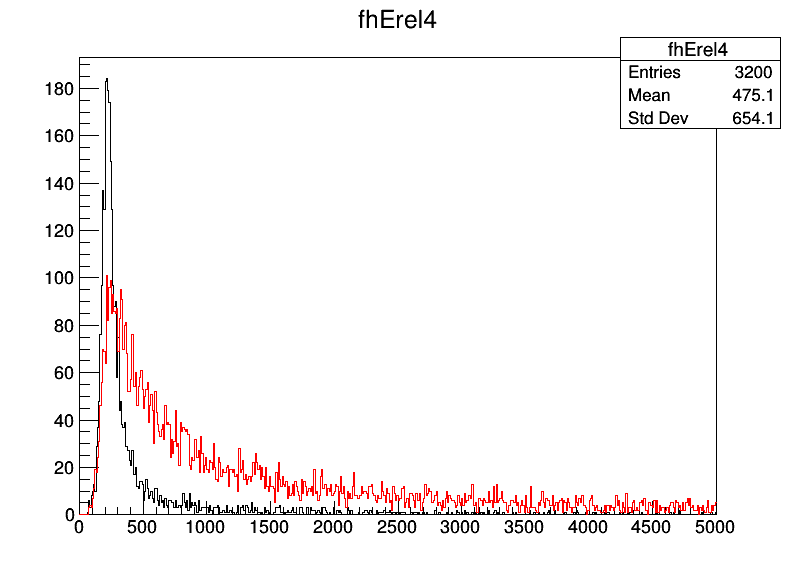

In [6]:
neutron = 4
fn = filename_for(distance=15, doubleplane=12, energy=500, erel=200, neutron=neutron, physics="inclxx", what=".reco.root")
f = ROOT.TFile.Open(fn)

c1 = ROOT.TCanvas("c1", "c1", 800, 600)

h1 = f.Get(f"NeulandRecoCheat/fhErel{neutron}").Clone()
print(h1.GetEntries())
h1.Rebin(10)
h1.SetLineColor(1)

h2 = f.Get(f"NeulandRecoFixedRValue/fhErel{neutron}").Clone()
print(h2.GetEntries())
h2.Rebin(10)
h2.SetLineColor(2)

h1.Draw("")
h2.Draw("same")

c1.Draw()